In [4]:
import sys
sys.path.append('/Users/stavrosvlachos/Desktop/Workspace/business-intelligence/')

from datamanagement.services import redshift
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
con = psycopg2.connect("dbname=dev host=redshift-prod.csyrzb3icveb.us-east-1.redshift.amazonaws.com port=5439 user=stavros password=F7mXrih76wCM")
cursor = con.cursor()

## Dataset

In [6]:
sql='''
with account_features as (

    select 
    id,
    date_trunc('day', mql_datestamp__c) as mql_date,
    region2__c as region,
    billing_country_iso__c as billing_country,
    case when lower(account_billing_city__c) ilike '%london%'
            or lower(account_billing_city__c) ilike '%new york%'
            or lower(account_billing_city__c) ilike '%san francisco%'
            or lower(account_billing_city__c) ilike '%chicago%'
            or lower(account_billing_city__c) ilike '%boston%'
            or lower(account_billing_city__c) ilike '%houston%'
            or lower(account_billing_city__c) ilike '%atlanta%'
            or lower(account_billing_city__c) ilike '%los angeles%'
            or lower(account_billing_city__c) ilike '%manchester%'
            or lower(account_billing_city__c) ilike '%paris%'
            or lower(account_billing_city__c) ilike '%birmingham%'
            or lower(account_billing_city__c) ilike '%dallas%'
            or lower(account_billing_city__c) ilike '%cambridge%'
            or lower(account_billing_city__c) ilike '%philadelphia%'
            or lower(account_billing_city__c) ilike '%austin%'
            or lower(account_billing_city__c) ilike '%washington%'
            or lower(account_billing_city__c) ilike '%denver%'
            or lower(account_billing_city__c) ilike '%dublin%'
            or lower(account_billing_city__c) ilike '%berlin%'
            or lower(account_billing_city__c) ilike '%miami%'
            or lower(account_billing_city__c) ilike '%seattle%'
            or lower(account_billing_city__c) ilike '%stockholm%'
            or lower(account_billing_city__c) ilike '%san diego%'
            or lower(account_billing_city__c) ilike '%portland%'
            or lower(account_billing_city__c) ilike '%sydney%'
            or lower(account_billing_city__c) ilike '%amsterdam%'
            or lower(account_billing_city__c) ilike '%palo alto%'
            or lower(account_billing_city__c) ilike '%singapore%'
            or lower(account_billing_city__c) ilike '%barcelona%'
            then 'major_city'
            else 'Other' end as city,
    numberofemployees,
    gtm_segment__c,
    abm_group__c,
    industry,
    sub_industry__c,
    persona__c,
    case when currently_using__c ilike '%none%'
        or currently_using__c ilike '%nothing%'
        or currently_using__c ilike '%manual%'
        or currently_using__c ilike '%pdf%'
        or currently_using__c ilike '%pdfs%'
        or currently_using__c ilike '%sheets%'
        or currently_using__c ilike '%spreadsheets%'
        or currently_using__c ilike '%email%'
        or currently_using__c ilike '%in-house%'
        or currently_using__c ilike '%inhouse%'
        or currently_using__c ilike '%in house%' then 'None'
    when  currently_using__c ilike '%bamboo%'
        or currently_using__c ilike '%breezy%'
        or currently_using__c ilike '%jazz%'
        or currently_using__c ilike '%homerun%'
        or currently_using__c ilike '%home run%'
        or currently_using__c ilike '%recruitee%'
        or currently_using__c ilike '%recruiter box%'
        or currently_using__c ilike '%recruiter-box%'
        or currently_using__c ilike '%recruiterbox%'
        or currently_using__c ilike '%paylocity%'
        or currently_using__c ilike '%personio%'
        or currently_using__c ilike '%peoplehr%'
        or currently_using__c ilike '%people-hr%'
        or currently_using__c ilike '%people hr%'
        or currently_using__c ilike '%teamtailor%'
        or currently_using__c ilike '%team tailor%'
        or currently_using__c ilike '%google hire%'
        or currently_using__c ilike '%googlehire%'
        or currently_using__c ilike '%g-hire%'
        or currently_using__c ilike '%ghire%'
        or currently_using__c ilike '%g hire%'
        or currently_using__c ilike '%welcome to the jungle%'
        or currently_using__c ilike '%welcometothejungle%'
        or currently_using__c ilike '%wttj%'
        or currently_using__c ilike '%adp%'
        or currently_using__c ilike '%ziprecruiter%'
        or currently_using__c ilike '%jobscore%' then 'Small Competitors'
    when currently_using__c ilike '%greenhouse%'
        or currently_using__c ilike '%green-house%'
        or currently_using__c ilike '%ghouse%'
        or currently_using__c ilike '%gh%'
        or currently_using__c ilike '%lever%'
        or currently_using__c ilike '%icims%'
        or currently_using__c ilike '%i-cims%'
        or currently_using__c ilike '%i cims%'
        or currently_using__c ilike '%smartrecruiter%'
        or currently_using__c ilike '%smart recruiter%'
        or currently_using__c ilike '%workday%'
        or currently_using__c ilike '%ultipro%'
        or currently_using__c ilike '%taleo%'
        or currently_using__c ilike '%softgarden%'
        or currently_using__c ilike '%success%'
        or currently_using__c ilike '%job vite%'
        or currently_using__c ilike '%jobvite%'
        or currently_using__c ilike '%cornerstone%'
        or currently_using__c ilike '%comeet%' then 'Strong Competitors'
    when currently_using__c ilike '%n/a%' then 'N/A'
        else 'Other' end as currently_using_group,
    case when sub_industry__c in 
    ('Casinos & Gaming', 'Consumer Services', 'Hotels, Restaurants & Leisure', 'Legal Services', 'Leisure Facilities', 'Restaurants', 'Specialized Consumer Services', 'Accounting', 'Banking & Mortgages', 'Finance', 'Financial Services', 'Health & Wellness', 'Health Care', 'Health Care Services', 'Life Sciences Tools & Services', 'Commercial Printing', 'Consulting', 'Corporate & Business', 'Design', 'Professional Services', 'Research & Consulting Services', 'Data Processing & Outsourced Services') then 'Tier 1'
    when sub_industry__c in ('Advertising', 'Broadcasting', 'Education', 'Education Services', 'Family Services', 'Media', 'Movies & Entertainment', 'Public Relations', 'Publishing', 'Oil & Gas', 'Architecture', 'Automation', 'Cloud Services', 'Graphic Design', 'Internet', 'Internet Software & Services', 'Building Materials', 'Integrated Telecommunication Services', 'Wireless Telecommunication Services') then 'Tier 2' else 'Other' end as ICP_tier,
     case when researcher_notes__c ilike '%fund%' 
        or researcher_notes__c ilike '%seed%' 
        or researcher_notes__c ilike '%raised%' then 1 else 0 end as received_funding,
    case when researcher_notes__c ilike '%series a%' then 1 else 0 end as received_series_a,
    case when researcher_notes__c ilike '%series b%' then 1 else 0 end as received_series_b,
    case when researcher_notes__c ilike '%series c%' then 1 else 0 end as received_series_c,
    case when researcher_notes__c ilike '%locations%' then 1 else 0 end as hiring_multiple_locations,
    case when researcher_notes__c ilike '%headcount growth%' 
        or researcher_notes__c ilike '%employment growth%'
        or researcher_notes__c ilike '%grew%'
        or researcher_notes__c ilike '%grown%'
        or researcher_notes__c ilike '%new hires%'
        or researcher_notes__c ilike '%new employees%' then 1 else 0 end as growth_turnover,
    case when researcher_notes__c ilike '%hiring for%' then 1 else 0 end as hiring,
    case when (researcher_notes__c ilike '%promoted%'
        or researcher_notes__c ilike '%joined%'
        or researcher_notes__c ilike '%just hired%'
        or researcher_notes__c ilike '%just got%'
        or researcher_notes__c ilike '%got a new%')
        and researcher_notes__c not ilike '%promoted jobs%' then 1 else 0 end as new_manager,
    annualrevenue
    from salesforce_accounts
    where mql_datestamp__c >= '2019-01-01' and outbound_account__c = 'True' and sdr_role__c ilike '%outbound%' and (mql_datestamp__c <= sal_datestamp__c or sal_datestamp__c is null)
                   
),
contact_features as (
                 
    select sa.id,
    max(case when email ilike '%gmail%' or email ilike '%hotmail%' or email ilike '%yahoo%' or email ilike '%outlook%' then 1 else 0 end) as has_at_least_one_non_company_email,
    max(case when 
    (title ilike '% ceo %' or title ilike '% cto %' or title ilike '% cmo %' or title ilike '% cio %' or title ilike '% cfo %' or title ilike '% cco %' or title ilike '% coo %' or title ilike '% cro %' or title ilike '% cdo %' or title ilike '% svp %' or title ilike '% chief %' or title ilike '% president %' or title ilike '% vp %') 
    and 
    ((sc.createddate <= sa.mql_datestamp__c) or (datediff('hours', sc.createddate, sa.mql_datestamp__c) < 5))
     then 1 else 0 end) as has_atl_contact,
    count(distinct case when 
    (title ilike '% ceo %' or title ilike '% cto %' or title ilike '% cmo %' or title ilike '% cio %' or title ilike '% cfo %' or title ilike '% cco %' or title ilike '% coo %' or title ilike '% cro %' or title ilike '% cdo %' or title ilike '% svp %' or title ilike '% chief %' or title ilike '% president %') 
    and 
    ((sc.createddate <= sa.mql_datestamp__c) or datediff('hours', sc.createddate, sa.mql_datestamp__c) < 5)
     then sc.id end) as num_of_atl_contacts,
    count(distinct case when sc.createddate <= sa.mql_datestamp__c or (datediff('hours', sc.createddate, sa.mql_datestamp__c) < 5) then sc.id end) as num_contacts,
    max(case when 
    (title ilike '%director%' or title ilike '%manager%' or title ilike '%recruit%' or title ilike '%talent%' or title ilike '%HR generalist%' or title ilike '%People%') 
    and 
    ((sc.createddate <= sa.mql_datestamp__c) or datediff('hours', sc.createddate, sa.mql_datestamp__c) < 5)
     then 1 else 0 end) as has_btl_contact,
    count(distinct case when 
    (title ilike '% vp %' or title ilike '%director%' or title ilike '%manager%' or title ilike '%recruit%' or title ilike '%talent%' or title ilike '%HR generalist%' or title ilike '%People%') 
    and 
    ((sc.createddate <= sa.mql_datestamp__c) or datediff('hours', sc.createddate, sa.mql_datestamp__c) < 5)
     then sc.id end) as num_of_btl_contacts

    from salesforce_accounts sa
    left join salesforce_contacts sc on sa.id = sc.accountid
    where sa.mql_datestamp__c >= '2019-01-01' and sa.outbound_account__c = 'True' and sa.sdr_role__c ilike '%outbound%' and (sc.createddate <= sa.sal_datestamp__c or sa.sal_datestamp__c is null)
group by 1
--) select * from data where has_executive_contact = 1 and num_contacts = 0 
                   
),
target as (
                   
    select sa.id,
    max(case when sop.createddate is not null and (sop.type = 'New Business' or sop.type = 'Convert to Annual')  and sop.stagename != 'Closed Won' then 1 else 0 end) as sql
    from salesforce_accounts sa
    left join salesforce_opportunities sop on sa.id = sop.accountid
    where sa.mql_datestamp__c >= '2019-01-01' and sa.outbound_account__c = 'True' and sa.sdr_role__c ilike '%outbound%' and (sop.createddate >= sa.mql_datestamp__c or sop.createddate is null)
    group by 1
                   
)
                   
select af.id,
    af.mql_date,
    af.region,
    af.billing_country,
    af.city,
    af.numberofemployees,
    af.gtm_segment__c,
    af.abm_group__c,
    af.industry,
    af.sub_industry__c,
    af.ICP_tier,
    af.persona__c,
    af.currently_using_group,
    af.received_funding,
    af.received_series_a,
    af.received_series_b,
    af.received_series_c,
    af.hiring_multiple_locations,
    af.growth_turnover,
    af.hiring,
    af.new_manager,
    af.annualrevenue,
    cf.has_at_least_one_non_company_email,
    cf.has_atl_contact,
    cf.num_of_atl_contacts,
    cf.has_btl_contact,
    cf.num_of_btl_contacts,
    cf.num_contacts,
    tr.sql
from account_features af 
inner join contact_features cf on af.id = cf.id
inner join target tr on af.id = tr.id
'''

In [7]:
# Save as pandas dataframe and display first 5 rows
data = pd.DataFrame(redshift.get_records(sql=sql, cursor=cursor))
data.head()

,id,mql_date,region,billing_country,city,numberofemployees,gtm_segment__c,abm_group__c,industry,sub_industry__c,...,hiring,new_manager,annualrevenue,has_at_least_one_non_company_email,has_atl_contact,num_of_atl_contacts,has_btl_contact,num_of_btl_contacts,num_contacts,sql
0,0016100000WjoJdAAJ,2019-10-11,Northern America,US,Other,150.0,Midsized Companies,Inbound,Diversified Consumer Services,Specialized Consumer Services,...,0,0,10000000.00,1,0,0,1,15,59,0
1,0016100000WjoZAAAZ,2019-08-21,Northern America,US,Other,57.0,Midsized Companies,Inbound,Media,Publishing,...,0,0,None,1,0,0,1,5,39,0
2,0014M00001jqdJqQAI,2019-10-16,Northern America,US,major_city,350.0,Enterprise,Good Fit,Internet Software & Services,Internet Software & Services,...,0,0,100000000.00,0,0,0,1,1,4,0
3,0016100000WjovfAAB,2019-07-23,Northern America,CA,Other,225000.0,Enterprise,MoFu,Diversified Consumer Services,Specialized Consumer Services,...,0,0,1000000000.00,0,0,0,1,6,11,0
4,0016100000WjpgrAAB,2019-09-25,Northern America,US,major_city,NaN,Small Business,Inbound,Internet Software & Services,Internet Software & Services,...,0,0,10000000.00,1,0,0,1,5,26,0


## Drop irrelevant columns & Encode categorical features

In [8]:
# Drop the "id", "mql_date", "numberofemployees", sub_industry__c" columns
df_mod = data.drop(columns=(["id","mql_date", "numberofemployees", "sub_industry__c"]),axis = 1)
print(df_mod.shape)
df_mod['annualrevenue'] = df_mod['annualrevenue'].astype(float)

# Encode categorical features
categorical_features = list(df_mod.select_dtypes(include=object).columns)
df_enc = pd.get_dummies(df_mod, columns = categorical_features)
print(df_enc.shape)

df_enc = df_enc.dropna().drop_duplicates()

# Replace special characters in df_enc
df_enc.columns = df_enc.columns.str.replace('[^A-Za-z0-9]+', '_')

(44702, 25)
(44702, 585)


## Split the dataset in Train & Test

In [9]:
# Split in train and test
from sklearn.model_selection import train_test_split
y = df_enc['sql']
X = df_enc

X_train, X_test_unk, y_train, y_test_unk = train_test_split(X.drop('sql', axis=1), y,
                                                            test_size=0.2, random_state=27,
                                                            stratify = y)

## Undersample Train dataset

In [10]:
# Create Train dataset by Concatenating [X_train, y_train]
df_train = pd.concat([X_train, y_train], axis = 1)
# Random shuffle
df_train = df_train.sample(frac=1)

sqls = df_train.sql.sum()

# Undersampling
sql_df = df_train.loc[df_train["sql"] == 1]
non_sql_df = df_train.loc[df_train["sql"] == 0][:10*sqls]

# Concat to create dataset
normal_distributed_df = pd.concat([sql_df, non_sql_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)


X_train, X_test_val, y_train, y_test_val = train_test_split(new_df.drop('sql', axis=1),
                                                            new_df.sql, 
                                                            test_size=0.2, 
                                                            random_state=27, 
                                                            stratify = new_df.sql)

## LightGBM

In [11]:
# LightGBM
import lightgbm
train_set = lightgbm.Dataset(X_train, label=y_train, params={'verbose': -1})

train_params = {
    'objective': 'binary',
    'num_leaves': 100,
    'random_seed': 3333,
    'learning_rate': 0.005,
    'boosting_type': 'gbdt',
    'verbose': -1
}

from lightgbm import LGBMClassifier
clf = LGBMClassifier(**train_params)
clf.fit(X_train, y_train.values.ravel())


import sklearn.metrics
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test_val, clf.predict_proba(X_test_val)[:,1])
y_pred = clf.predict_proba(X_test_val)[:,1]
y_pred_binary = [1 if y>0.1 else 0 for y in y_pred]
print("AUC:", sklearn.metrics.auc(fpr, tpr))
print("F1 Score:", sklearn.metrics.f1_score(y_test_val, y_pred_binary))
print("Confusion Matrix:", sklearn.metrics.confusion_matrix(y_test_val, y_pred_binary))

AUC: 0.8222091263605147
F1 Score: 0.3526011560693642
Confusion Matrix: [[626 202]
 [ 22  61]]


### Feature importance

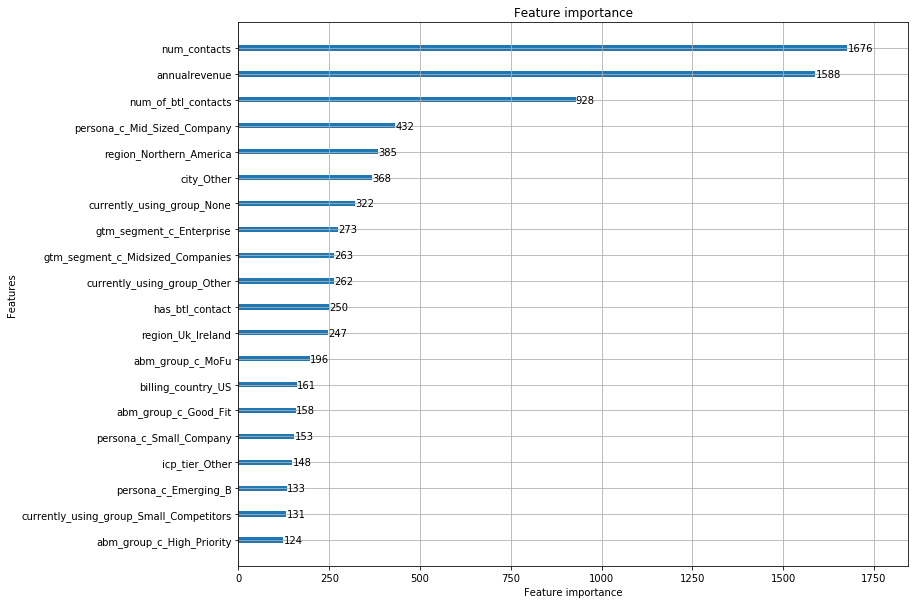

In [12]:
lightgbm.plot_importance(
   clf,
   figsize=(12, 10),
   max_num_features=20
);

In [135]:
y_test_val.shape

(883,)

In [136]:
sum(1-y_pred>0.8)

763

In [140]:
#max(y_pred)
883- sum(1-y_pred>0.90)

226

### Test in the unknown dataset

In [142]:
import sklearn.metrics
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test_unk, clf.predict_proba(X_test_unk)[:,1])
y_pred = clf.predict_proba(X_test_unk)[:,1]
y_pred_binary = [1 if y>0.1 else 0 for y in y_pred]
print("AUC:", sklearn.metrics.auc(fpr, tpr))
print("F1 Score:", sklearn.metrics.f1_score(y_test_unk, y_pred_binary))
print("Confusion Matrix:n\", sklearn.metrics.confusion_matrix(y_test_unk, y_pred_binary))

AUC: 0.8126363396276244
F1 Score: 0.08060747663551401
Confusion Matrix: [[6030 1543]
 [  31   69]]


### Cross-validation

In [145]:
train_params = {
    'objective': 'binary',
    'num_leaves': 1000,
    'random_seed': 3333,
    'learning_rate': 0.02,
    'verbose': -1
}


# Cross-validation
N_FOLDS = 10
MAX_BOOST_ROUNDS = 700
train_params = {
    'objective': 'binary',
    'num_leaves': 1000,
    'random_seed': 3333,
    'verbose': -1,
    'learning_rate': 0.02,
}
d_train = lightgbm.Dataset(X_train, label=y_train, params={'verbose': -1})

cv_results = lightgbm.cv(train_params, d_train, num_boost_round=MAX_BOOST_ROUNDS, nfold=N_FOLDS, 
                    verbose_eval=20, early_stopping_rounds=40, metrics=['auc'],
                        stratified=True)

print('Current parameters:\n', train_params)
# print('\nBest num_boost_round:', len(cv_results['auc-mean']))
print('Best CV-AUC score:', cv_results['auc-mean'][-1])
# print('Best CV-AUC score:', cv_results['accuracy-mean'][-1])

[20]	cv_agg's auc: 0.793127 + 0.0233545
[40]	cv_agg's auc: 0.793214 + 0.0263061
[60]	cv_agg's auc: 0.799741 + 0.022779
[80]	cv_agg's auc: 0.804519 + 0.0234537
[100]	cv_agg's auc: 0.806729 + 0.0246226
[120]	cv_agg's auc: 0.805825 + 0.0246613
Current parameters:
 {'objective': 'binary', 'num_leaves': 1000, 'random_seed': 3333, 'verbose': -1, 'learning_rate': 0.02}
Best CV-AUC score: 0.806813615676331


### Grid Search

In [149]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1],
    'n_estimators': range(100, 1000, 100),
    'num_leaves': [8, 16, 20, 24, 28, 32],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [3333],
}

clf = LGBMClassifier()
# Create the grid
grid = GridSearchCV(clf, gridParams,
                    verbose=3,
                    cv=5,
                    n_jobs=-1,
                    scoring='roc_auc'
                    )
# Run the grid
grid.fit(X, y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

clf = LGBMClassifier(**grid.best_params_)
clf.fit(X_train, y_train)


fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test_val, clf.predict_proba(X_test_val)[:,1])
print('[BestParams]-AUC Score on test: {}'.format(sklearn.metrics.auc(fpr, tpr)))

# #current['prediction'] = clf.predict(current)
# fpr, tpr, thresholds = sklearn.metrics.roc_curve(target_current, clf.predict(current))
# print('[BestParams]-AUC Score on test: {}'.format(sklearn.metrics.auc(fpr, tpr)))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 15.9min finished


{'boosting_type': 'gbdt', 'learning_rate': 0.005, 'n_estimators': 100, 'num_leaves': 8, 'objective': 'binary', 'random_state': 3333}
1.0
[BestParams]-AUC Score on test: 0.8478907222914073
